In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [ ]:
# read the dataset
digits = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
# head
digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
four = digits.iloc[3, 1:]
four.shape

(784,)

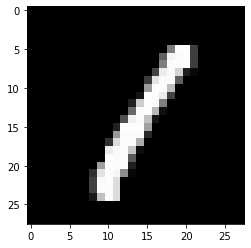

In [ ]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [ ]:
# visualise the array
print(four[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0  68 236 251 211  31   8   0]
 [  0   0   0   0   0   0   0   0   0   0  60 228 251 251  94   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 155 253 253 189   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 253 251 235  66   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32 205 253 251 126   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 104 251 253 184  15   0   0   0   0   0]
 [  0   0   0   0   0   0   0  80 240 251 193  23   0   0   0   0   0   0]
 [  0   0   0   0   0   0  32 253 253 253 159   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 151 251 251 251  39   0   0   0   0   0   0   0]
 [  0   0   0   0   0  48 221 251 251 172   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 234

In [ ]:
# Summarise the counts of 'label' to see how many labels of each digit are present
digits.label.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [ ]:
# Summarise count in terms of percentage 
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.24
7    10.44
3    10.22
2     9.93
9     9.92
0     9.87
6     9.86
8     9.75
4     9.74
5     9.04
Name: label, dtype: float64

In [ ]:
# missing values - there are none
digits.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
# average values/distributions of features
description = digits.describe()
description

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6000, 784)
(54000, 784)
(6000,)
(54000,)


In [ ]:
# delete test set from memory, to avoid a memory error
# we'll anyway use CV to evaluate the model, and can use the separate test.csv file as well
# to evaluate the model finally

# del x_test
# del y_test

In [ ]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

KeyboardInterrupt: ignored

In [ ]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

In [ ]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9089814814814815

In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5335
           1       0.93      0.98      0.95      6047
           2       0.88      0.91      0.90      5352
           3       0.88      0.87      0.87      5514
           4       0.90      0.92      0.91      5266
           5       0.88      0.85      0.86      4875
           6       0.95      0.95      0.95      5331
           7       0.94      0.91      0.92      5659
           8       0.92      0.84      0.88      5264
           9       0.89      0.89      0.89      5357

    accuracy                           0.91     54000
   macro avg       0.91      0.91      0.91     54000
weighted avg       0.91      0.91      0.91     54000



In [ ]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

351

### Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [ ]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
predictions = svm_rbf.predict(x_test)

# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.927962962962963


In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5335
           1       0.96      0.98      0.97      6047
           2       0.83      0.94      0.88      5352
           3       0.92      0.89      0.91      5514
           4       0.94      0.92      0.93      5266
           5       0.92      0.90      0.91      4875
           6       0.95      0.95      0.95      5331
           7       0.93      0.92      0.93      5659
           8       0.93      0.89      0.91      5264
           9       0.92      0.91      0.91      5357

    accuracy                           0.93     54000
   macro avg       0.93      0.93      0.93     54000
weighted avg       0.93      0.93      0.93     54000



In [ ]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters,return_train_score=True, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.424252,0.223730,5.277105,0.027402,1,0.01,"{'C': 1, 'gamma': 0.01}",0.732500,0.736667,0.725833,0.733333,0.747500,0.735167,0.007099,9,0.999792,1.000000,1.000000,1.000000,1.000000,0.999958,0.000083
1,10.603104,0.062639,3.215572,0.013228,1,0.001,"{'C': 1, 'gamma': 0.001}",0.930000,0.935833,0.916667,0.926667,0.932500,0.928333,0.006562,3,0.975417,0.974375,0.975417,0.976458,0.973958,0.975125,0.000880
2,15.958861,0.099393,4.284985,0.021899,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.891667,0.900000,0.885000,0.895000,0.905833,0.895500,0.007102,6,0.913542,0.909583,0.914375,0.911667,0.910000,0.911833,0.001888
3,39.204083,0.223268,5.224555,0.008162,10,0.01,"{'C': 10, 'gamma': 0.01}",0.750833,0.757500,0.742500,0.755833,0.760000,0.753333,0.006191,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,9.082436,0.057923,2.915392,0.026781,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.943333,0.932500,0.938333,0.939167,0.939000,0.003704,1,0.999375,0.999583,0.998958,0.999167,0.999792,0.999375,0.000295
5,7.187546,0.077794,2.757351,0.029516,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.924167,0.935833,0.915833,0.925833,0.925833,0.925500,0.006360,5,0.966250,0.962292,0.965000,0.963958,0.964167,0.964333,0.001300
6,39.297535,0.303731,5.237116,0.024619,100,0.01,"{'C': 100, 'gamma': 0.01}",0.750833,0.757500,0.742500,0.755833,0.760000,0.753333,0.006191,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,9.038616,0.054332,2.917388,0.028803,100,0.001,"{'C': 100, 'gamma': 0.001}",0.940000,0.943333,0.935000,0.938333,0.938333,0.939000,0.002708,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,5.449912,0.078395,2.269555,0.025295,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.923333,0.932500,0.924167,0.921667,0.925833,0.925500,0.003749,4,0.995833,0.995000,0.995625,0.995625,0.995833,0.995583,0.000306


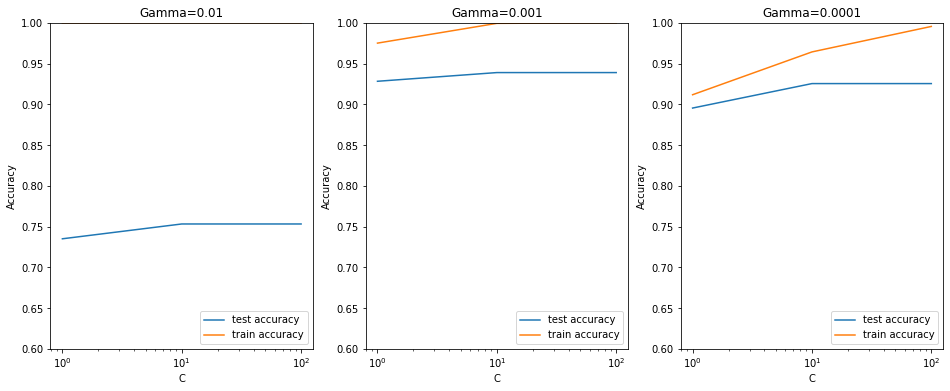

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [ ]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
predictions = svm_final.predict(x_test)

In [ ]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy*100, "%\n")
print(confusion)


92.78703703703704 %

[[5140    1   35    7   10   25   60    6   48    3]
 [   1 5936   47   13    8    7    6   11   12    6]
 [  34   35 4972   63   48    7   59   56   69    9]
 [   9   35  219 4900   10  138   10   64   94   35]
 [   7   25   88    3 4880   14   26   25   11  187]
 [  34   24   57  142   27 4399   92   19   44   37]
 [  27   20   74    0   27   58 5098    2   25    0]
 [   6   45  128   17   76    0    1 5225    8  153]
 [  23  105   82  114   25  133   36   19 4672   55]
 [  19   19   43   69  104   21    1  167   31 4883]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
